In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Bar Chart

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


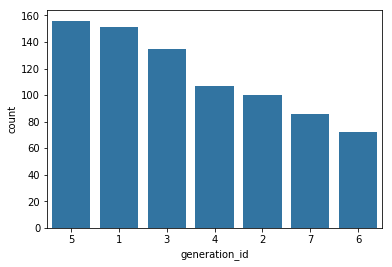

In [4]:
base_color = sb.color_palette()[0]
gen_order = pokemon['generation_id'].value_counts().index
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, 
             order = gen_order);

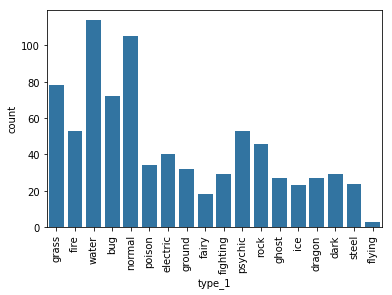

In [5]:
sb.countplot(data = pokemon, x = 'type_1', color = base_color);
plt.xticks(rotation = 90);

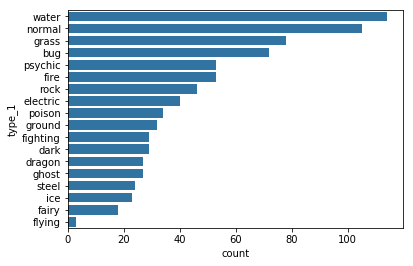

In [10]:
type_counts = pokemon['type_1'].value_counts()
type_order = type_counts.index
sb.countplot(data = pokemon, y = 'type_1', color = base_color, 
             order = type_order);

In [11]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
max_prop

0.1412639405204461

In [12]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14']

In [13]:
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14])

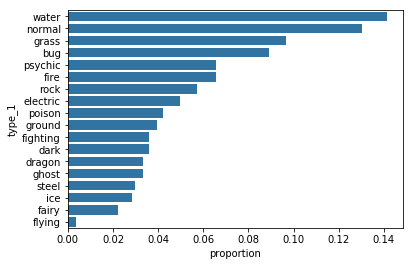

In [14]:
sb.countplot(data = pokemon, y = 'type_1', color = base_color, 
             order = type_order);
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

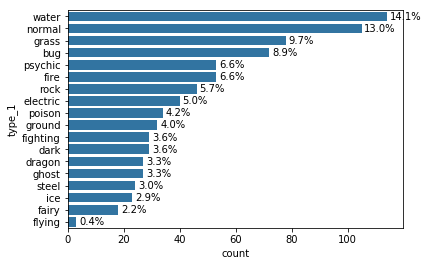

In [15]:
sb.countplot(data = pokemon, y = 'type_1', color = base_color, 
             order = type_order);
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center')

## Pie Chart

In [16]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [17]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

(-1.1010649271147273, 1.1037338461314978, -1.101693669869755, 1.10310510337647)

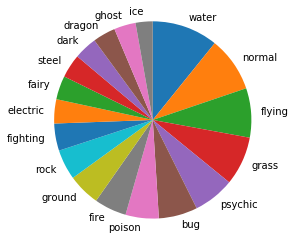

In [19]:
plt.pie(type_counts, labels = type_counts.index, startangle = 90,
       counterclock = False)
plt.axis('square')

(-1.1010649271147273, 1.1037338461314978, -1.101693669869755, 1.10310510337647)

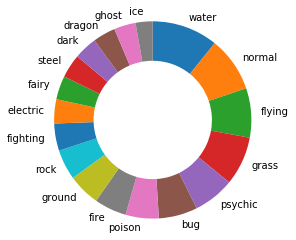

In [20]:
plt.pie(type_counts, labels = type_counts.index, startangle = 90,
       counterclock = False, wedgeprops = {'width': 0.4})
plt.axis('square')

## Histogram

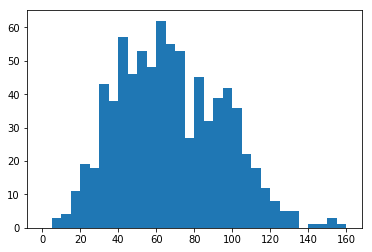

In [24]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

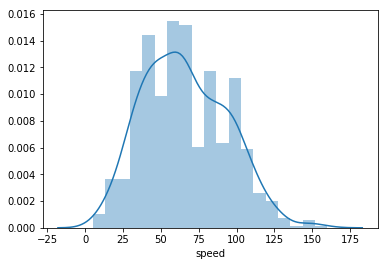

In [27]:
sb.distplot(pokemon['speed']);

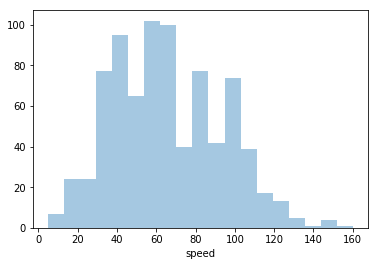

In [29]:
sb.distplot(pokemon['speed'], kde = False);

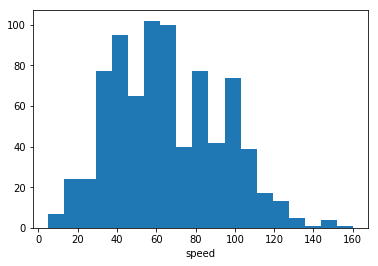

In [30]:
sb.distplot(pokemon['speed'], kde = False, hist_kws = {'alpha':1});

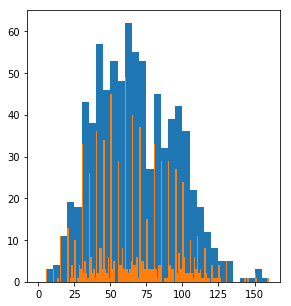

In [36]:
plt.figure(figsize = [10, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

bins = np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bins);